## Imports

In [ ]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS


nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Graphs

We use Google Colab because some of these operations are extremely costly, both in computation time and computational resources required to run (RAM, CPU)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tweets_all = pd.read_csv('/content/drive/MyDrive/results.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
tweets_all = tweets_all.loc[:, ~tweets_all.columns.str.contains('^Unnamed')]
tweets_all = tweets_all.dropna(how='any',axis=0) 

In [ ]:
len(tweets_all)

7089271

In [ ]:
user_count = tweets_all['UserName'].nunique()
print('The number of unique users tweeting about Bitcoin is',user_count)

The number of unique users tweeting about Bitcoin is 1133584


In [ ]:
tweet_count = tweets_all['Text'].nunique()
print('The number of unique tweets regarding Bitcoin is',tweet_count)

The number of unique tweets regarding Bitcoin is 2780416


In [ ]:
username_counts = tweets_all['UserName'].value_counts()
username_counts

Brett Murphy              37256
Mini @Girl+Crypto          8795
BTC Market Alert🚨          8710
BTC情報アラート📊                 7877
BitcoinAgile               7708
                          ...  
aaron colby                   1
Tatiana Fernandez             1
Lewd Nude Cartoonist 🔞        1
🧲✨                            1
You can call me Carmen        1
Name: UserName, Length: 1133584, dtype: int64

On the graph below we observe that the majority of users tweeted less than 5 times in the course of one month about Bitcoin

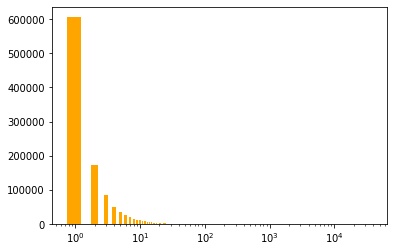

In [ ]:
c = Counter(username_counts)

plt.bar(c.keys(), c.values(),width = 0.5,color = 'orange')
plt.xscale('log')
plt.show()

In [ ]:
tweets_not_botted = pd.read_csv('/content/drive/MyDrive/tweets_not_botted.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We want to make a Wordcloud of the non-botted Tweet dataset text but it is too large for the PC to handle (RAM crashes, even the built-in RAM from Google Colab). So instead we keep only a portion of the whole dataset (1.8 million rows)

In [ ]:
tweets_half = tweets_all[0:1800000]

In [ ]:
long_string = " ".join(tweets_half['Text'])

In [ ]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

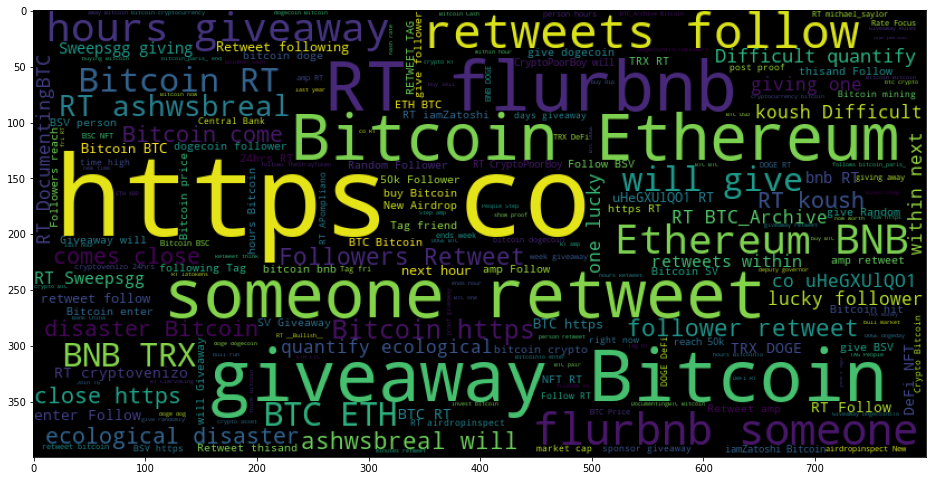

In [ ]:
plt.figure(figsize=(16, 12))
wordcloud.generate(long_string)
plt.imshow(wordcloud);

And this is for the non-botted Dataset

In [ ]:
long_string_not_botted = " ".join(tweets_not_botted['Text'][0:1800000])

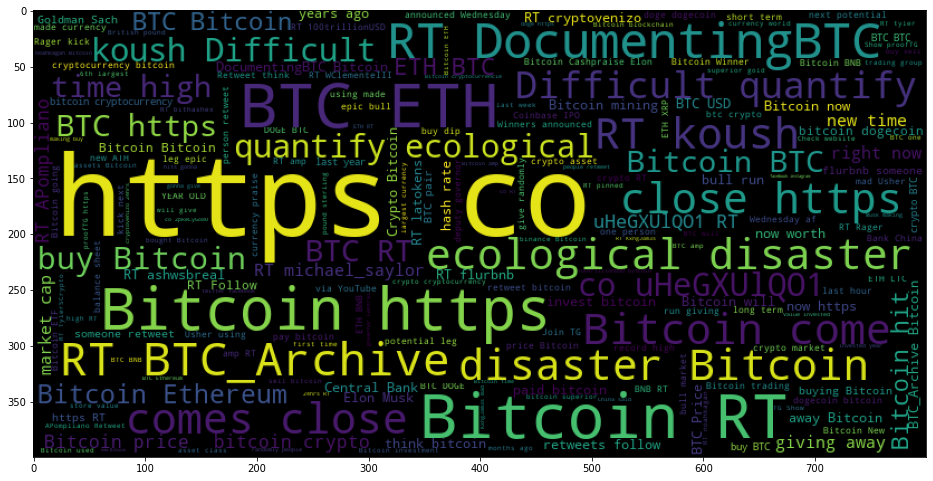

In [ ]:
plt.figure(figsize=(16, 12))
wordcloud.generate(long_string_not_botted)
plt.imshow(wordcloud);